Import libraries

In [1]:
import traceback
import functools
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Config

In [2]:
CLIENT_CREDIT_DATA_FILE_PATH = '../data/client_credit.csv'

Import dataset

In [3]:
df = pd.read_csv(CLIENT_CREDIT_DATA_FILE_PATH, skiprows=[0])

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Seperate into X and Y

In [5]:
X = df.drop(['ID', 'default payment next month'], axis=1)
y = df['default payment next month']

Split the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Classification task

In [7]:
def classify(classifier_class, X_train, y_train, X_test, y_test):
    model = classifier_class()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    plot_confusion_matrix(model, X_test, y_test)  
    plt.show()

    print('Accuracy: {:.2f}'.format(accuracy))
    print('F1 score: {:.2f}'.format(f1))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))

In [8]:
# (functools.partial(XGBClassifier, use_label_encoder=False, eval_metric='logloss'), 'XGBoost'),
#     (functools.partial(RandomForestClassifier, n_jobs=-1), 'Random Forest'),
#     (functools.partial(tree.DecisionTreeClassifier), 'Decision Tree'),
#     (, 'Logistic Regression'),


Logistic regression

d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function 

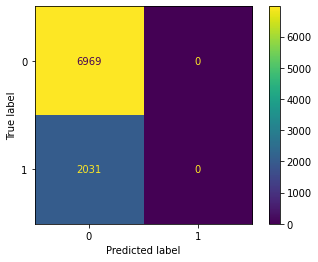

Accuracy: 0.77
F1 score: 0.00
Precision: 0.00
Recall: 0.00


In [9]:
classify(
    functools.partial(LogisticRegression, random_state=0), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Perceptron

d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


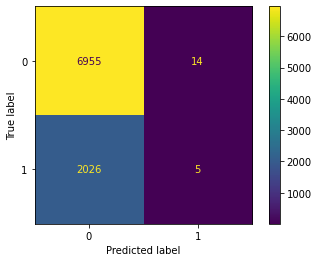

Accuracy: 0.77
F1 score: 0.00
Precision: 0.26
Recall: 0.00


In [10]:
classify(
    functools.partial(Perceptron, random_state=0), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Decision tree

d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


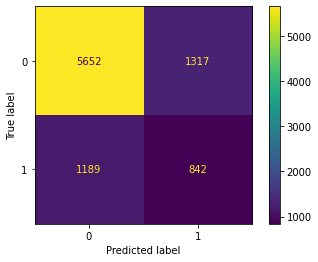

Accuracy: 0.72
F1 score: 0.40
Precision: 0.39
Recall: 0.41


In [11]:
classify(
    functools.partial(DecisionTreeClassifier, random_state=0), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

SVM

d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


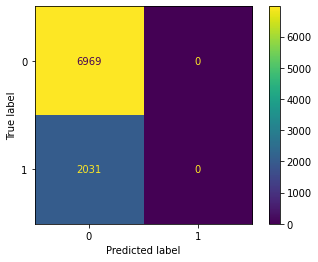

Accuracy: 0.77
F1 score: 0.00
Precision: 0.00
Recall: 0.00


In [12]:
classify(
    functools.partial(SVC, random_state=0), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Random forest

d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


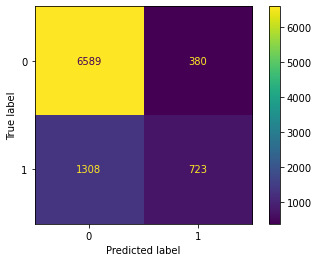

Accuracy: 0.81
F1 score: 0.46
Precision: 0.66
Recall: 0.36


In [13]:
classify(
    functools.partial(RandomForestClassifier, random_state=0, n_jobs=-1), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

XGBoost

[23:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
d:\git\isuri-credit-dataset-analysis\venv_windows\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


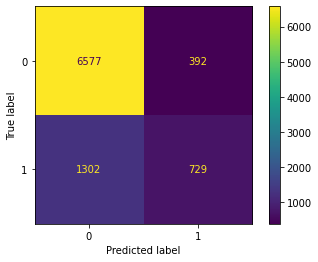

Accuracy: 0.81
F1 score: 0.46
Precision: 0.65
Recall: 0.36


In [14]:
classify(
    functools.partial(XGBClassifier, random_state=0), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

# Regression task

Linear regression

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

try:
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE: {:.2f}'.format(rmse))
except:
    traceback.print_exc()

try:
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE: {:.2f}'.format(mae))
except:
    traceback.print_exc()

try:
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print('MAPE: {:.2f}'.format(mape))
except:
    traceback.print_exc()

RMSE: 0.39
MAE: 0.31
MAPE: 692626405230816.12
